In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('dataset/churn.csv')

In [2]:
df

NameError: name 'df' is not defined

In [1]:
df['CreditUtilization'] = df['Balance']/df['CreditScore']
# Interaction Score
df['InteractionScore'] = df['NumOfProducts'] + df['HasCrCard'] + df['IsActiveMember']
# Balance to Salary Ratio
df['BalanceToSalary'] = df['Balance']/df['EstimatedSalary']

NameError: name 'df' is not defined

In [26]:
df_new = df.drop(['Surname', 'RowNumber', 'CustomerId', 'Geography', 'Gender'], axis=1)

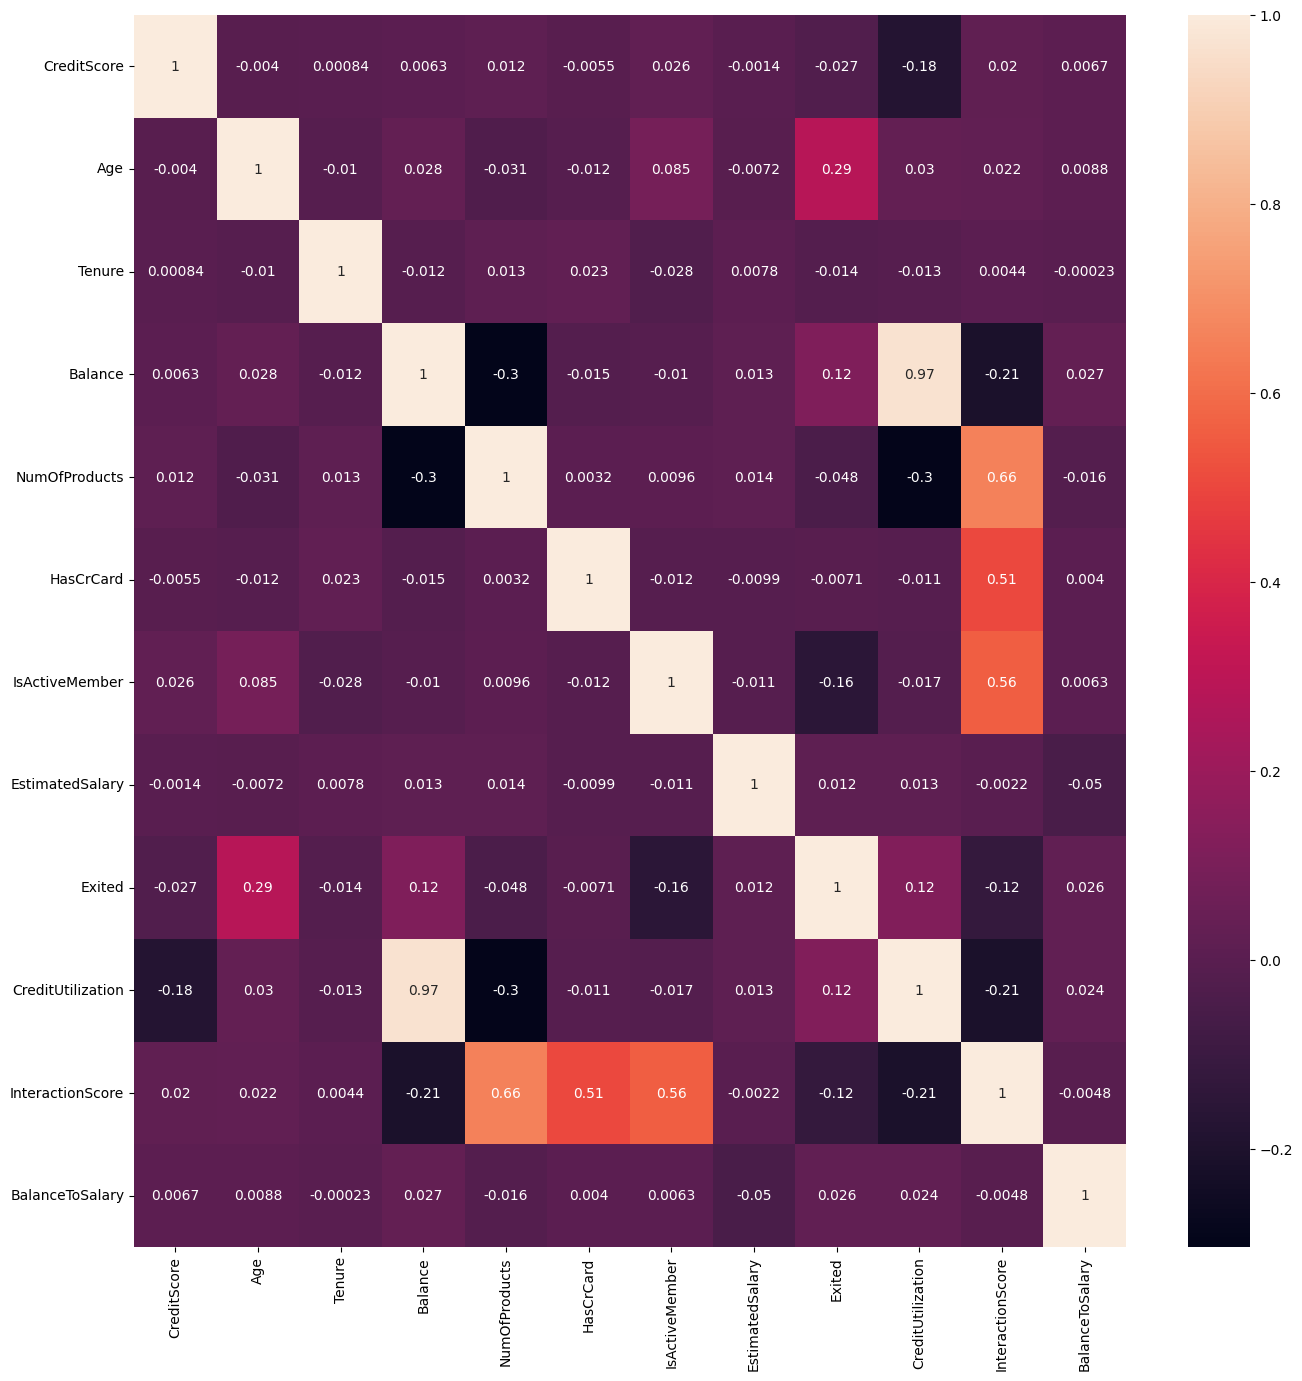

In [27]:
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(), annot=True)

plt.show()

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [29]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [30]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditUtilization,InteractionScore,BalanceToSalary
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,0.000000,3,0.000000
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,137.841875,2,0.744677
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,318.049402,4,1.401375
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0.000000,2,0.000000
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,147.659788,3,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,0.000000,3,0.000000
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,111.181415,3,0.564108
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,0.000000,2,0.000000
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,97.247811,3,0.808230


In [31]:
df['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [32]:
ohe = OneHotEncoder(sparse_output=False) 

geo_encoded = ohe.fit_transform(df[['Geography']])

In [33]:
ohe.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [34]:
geo_df = pd.DataFrame(geo_encoded, columns=ohe.get_feature_names_out())

In [35]:
df = df.drop('Geography', axis=1)

In [36]:
df = pd.concat([df, geo_df], axis=1)

In [37]:
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditUtilization,InteractionScore,BalanceToSalary,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,3,0.000000,1.0,0.0,0.0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,137.841875,2,0.744677,0.0,0.0,1.0
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,318.049402,4,1.401375,1.0,0.0,0.0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,2,0.000000,1.0,0.0,0.0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,147.659788,3,1.587055,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,0.000000,3,0.000000,1.0,0.0,0.0
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,111.181415,3,0.564108,1.0,0.0,0.0
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,0.000000,2,0.000000,1.0,0.0,0.0
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,97.247811,3,0.808230,0.0,1.0,0.0


In [38]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'CreditUtilization', 'InteractionScore',
       'BalanceToSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [39]:
X = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
Y = df['Exited']
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditUtilization,InteractionScore,BalanceToSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0.000000,3,0.000000,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,137.841875,2,0.744677,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,318.049402,4,1.401375,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0.000000,2,0.000000,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,147.659788,3,1.587055,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0.000000,3,0.000000,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,111.181415,3,0.564108,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,0.000000,2,0.000000,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,97.247811,3,0.808230,0.0,1.0,0.0


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=3,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)

rf_grid.fit(X_train_scaled, Y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fo

In [53]:
print(rf_grid.best_params_)
best_rf = rf_grid.best_estimator_

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
y_pred_rf = best_rf.predict(X_test_scaled)

In [56]:
rf_accuracy = accuracy_score(Y_test, y_pred_rf)

In [57]:
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}")

Random Forest Test Accuracy: 0.8690


In [58]:
print(confusion_matrix(Y_test, y_pred_rf))

[[2361   55]
 [ 338  246]]


In [ ]:
import joblib
joblib.dump(best_rf, 'new_model.pkl')

['model.pkl']

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
with open('new_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)